# Exploring Financial Data using Nasdaq Data Link API

**The goal is :**
analyze trends in Accrued Expenses Turnover across different companies and understand how various regions contribute to these financial metrics

- **This particular table is filterable on columns :**
date, ticker, shares_oustanding, nav and flow_daily

- **a sample of request that returns those rows from the "ETFG/FUND" table whose "ticker" column has a value of "SPY" :**
"https://data.nasdaq.com/api/v3/datatables/ETFG/FUND.json?ticker=SPY&api_key=YOURAPIKEY"


- **PARAMETERS**
1. qopts.columns
2. qopts.per_page (maximum of 10,000 rows)

- **RATE LIMITS**
1. limit of 300 calls per 10 seconds, 2,000 calls per 10 minutes and a limit of 50,000 calls per day
2. Subscribers are limited to requesting 60 bulk download files every hour.



In [7]:
# importing all needed libraries
import requests
from requests.exceptions import RequestException, HTTPError
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import config


In [20]:
api_key = config.API_KEY
#base url with product code [MER/F1] in json mode
base_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {'api_key': api_key,
              'qopts.per_page' : 10000
             }
             

#get the data, pass parameters and convert to json :
response = requests.get(base_url, params=parameters)
data_json = response.json()
#print(data_json)

data_json_rows = data_json['datatable']['data']
data_json_cols = [col['name'] for col in data_json['datatable']['columns']]

#creating Dataframe from json:
df_data = pd.DataFrame(data_json_rows, columns=data_json_cols)
df_data.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

# Accrued Expenses Turnover
Accrued Expenses Turnover" is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:
1. Cash Flow Management
2. Operational Efficiency
3. Financial Health Indicator



In [26]:
#specify necessary columns :
necessary_columns = ['indicator', 'country', 'longname', 'reportdate', 'reporttype', 'amount']

#filtering the dataset to only includes necessary columns and indicator's value = Accrued Expenses Turnover
filtered_df = df_data[necessary_columns]
filtered_df = filtered_df[filtered_df['indicator']== 'Accrued Expenses Turnover']
filtered_df.describe()

,amount
count,139.000000
mean,26.908762
std,33.097291
min,4.689773
25%,9.675670
50%,13.753753
75%,31.777614
max,229.810427


we deduced that the average Accrued Expenses Turnover ratio for companies is around 26.91, with a wide range from 4.69 to 229.81. This variation signifies diverse financial management strategies among companies. The standard deviation of 33.10 suggests substantial differences in how companies manage their short-term liabilities, influenced by factors like industry and company size.

# Enhancing the DataFrame
Enhancing the readability and information quality of our DataFrame is crucial for clear analysis and reporting. We will focus on two enhancements: 
1. adding a column with full country names
2. cleaning up the column names

In [27]:
# the unique abbreviations country names
filtered_df['country'].unique()

array(['DEU', 'BHS', 'GBR', 'JPN', 'CYM', 'USA', 'IRL'], dtype=object)

In [45]:
#Assigning the actual names of countries to their codes in a dictionary
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'GBR':'Great Britan'
}
#Define a function that takes a country name and returns its full name
def get_full_country_name(country_name):
    # Refer to the existing country_dict
    return country_mapping.get(country_name.upper(), country_name)

#testing the function
print(get_full_country_name('usa'))

United States of America


In [46]:
#apply the function to country col and store it as a new columns with the name of countries
filtered_df['country_name'] = filtered_df['country'].apply(get_full_country_name)

#change the column name for readability
filtered_df = filtered_df.rename( columns = {'longname': 'company_name',
                                            'reportdate' : 'report_date',
                                            'reporttype' : 'report_type'})

updated_df = filtered_df.copy()
#get the frequency of the countries in our DataFrame
print(updated_df['country_name'].value_counts())
updated_df.head()


country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Great Britan                 4
Name: count, dtype: int64


,indicator,country,company_name,report_date,report_type,amount,country_name
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948,Germany
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754,Germany
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213,Germany
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545,Germany
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041,Germany


#  Financial Trends in 2010 to 2015
Select only the relevant columns needed for trend analysis : company_name, report_date, amount



In [52]:
#checking the report_date is in the correct format and filtering the DataFrame
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

relevant_columns = ['company_name', 'report_date', 'amount']
relevant_data = updated_df[relevant_columns]


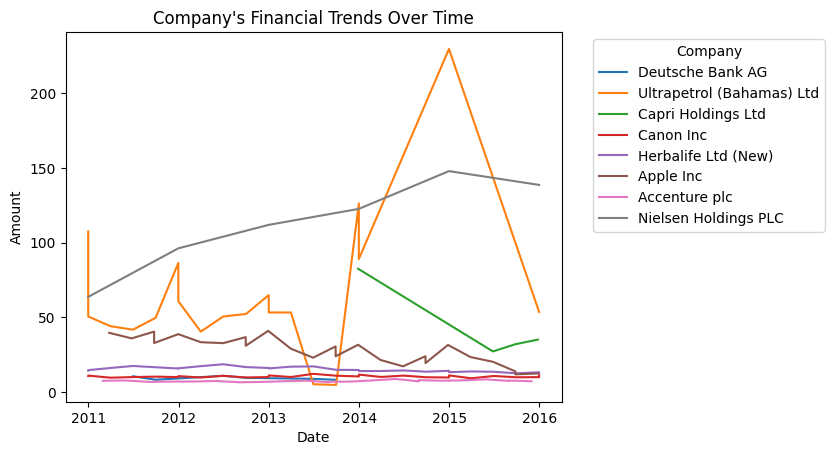

In [67]:
companies = relevant_data['company_name'].unique()
# Loop over each company and plot data
for company in companies :
    company_data = relevant_data[relevant_data['company_name'] == company ]
    plt.plot(company_data['report_date'], company_data['amount'], label = company)
plt.title("Company's Financial Trends Over Time")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legends for each company
plt.show()

# Geographical Region Analysis
Grouping data by country and calculating metrics such as the average financial amount enables a deep understanding of regional performance, highlighting disparities and trends across different markets. 

In [61]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = updated_df.groupby('country_name')['amount'].mean()
print(country_avg.sort_values())

country_name
Ireland                      7.264400
Germany                      9.288999
Japan                       10.376605
Cayman Islands              15.060796
Great Britan                44.166750
United States of America    44.377585
Bahamas                     66.515369
Name: amount, dtype: float64


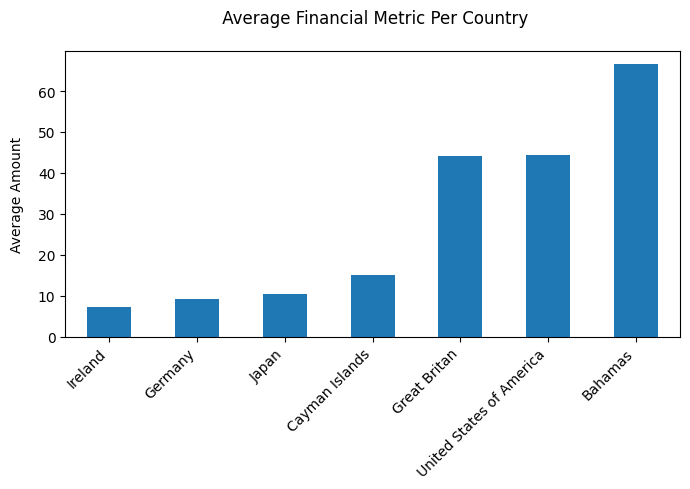

In [86]:
fig, ax = plt.subplots(figsize=(7, 5))
country_avg.sort_values().plot(kind='bar',ax=ax)
ax.set_title(' Average Financial Metric Per Country', pad=20)
ax.set_xlabel("")
ax.set_ylabel('Average Amount',labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # 'ha' means horizontal alignmentplt.tight_layout()
fig.tight_layout()
plt.show()